<a href="https://colab.research.google.com/github/nasgormaniac/mlops-tugas1/blob/main/MLOps_tugas1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Data Sederhana

## Dataset dari https://www.kaggle.com/datasets/drahulsingh/best-selling-manga

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("best-selling-manga.csv")
df

,Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s)
0,One Piece,Eiichiro Oda,Shueisha,Shōnen,104,1997–present,516.6,4.97
1,Golgo 13,"Takao Saito, Saito Production",Shogakukan,Seinen,207,1968–present,300.0,1.45
2,Case Closed / Detective Conan,Gosho Aoyama,Shogakukan,Shōnen,102,1994–present,270.0,2.65
3,Dragon Ball,Akira Toriyama,Shueisha,Shōnen,42,1984–1995,260.0,6.19
4,Doraemon,Fujiko F. Fujio,Shogakukan,Children,45,1969–1996,250.0,4.71
...,...,...,...,...,...,...,...,...
182,Sukeban Deka,Shinji Wada,Hakusensha,Shōjo,22,1976–1982,20.0,0.90
183,Swan,Kyoko Ariyoshi,Shueisha,Shōjo,21,1976–1981,20.0,0.95
184,The Tale of Genji,Waki Yamato,Kodansha,Shōjo,13,1980–1993,20.0,1.53
185,Tokyo Daigaku Monogatari,Tatsuya Egawa,Shogakukan,Seinen,34,1992–2001,20.0,0.58


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Manga series                            187 non-null    object 
 1   Author(s)                               187 non-null    object 
 2   Publisher                               187 non-null    object 
 3   Demographic                             187 non-null    object 
 4   No. of collected volumes                187 non-null    int64  
 5   Serialized                              187 non-null    object 
 6   Approximate sales in million(s)         187 non-null    float64
 7   Average sales per volume in million(s)  187 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 11.8+ KB


In [ ]:
df.isnull().sum()

,0
Manga series,0
Author(s),0
Publisher,0
Demographic,0
No. of collected volumes,0
Serialized,0
Approximate sales in million(s),0
Average sales per volume in million(s),0


In [ ]:
df.describe()

,No. of collected volumes,Approximate sales in million(s),Average sales per volume in million(s)
count,187.000000,187.000000,187.000000
mean,46.048128,50.764332,1.377380
std,34.678288,57.178028,1.240013
min,5.000000,20.000000,0.190000
25%,23.500000,24.500000,0.670000
50%,34.000000,31.000000,1.030000
75%,56.500000,50.500000,1.650000
max,207.000000,516.600000,10.000000


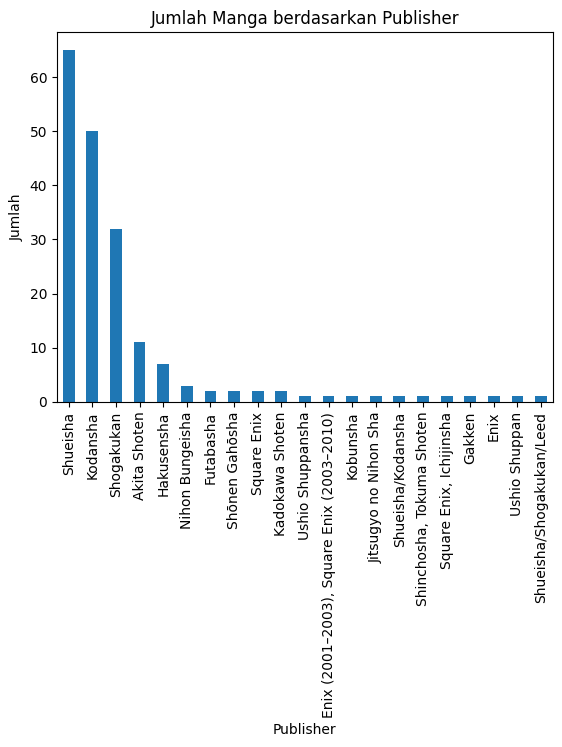

In [ ]:
df["Publisher"].value_counts().plot(kind="bar", xlabel="Publisher", ylabel="Jumlah", title= "Jumlah Manga berdasarkan Publisher")
plt.show()

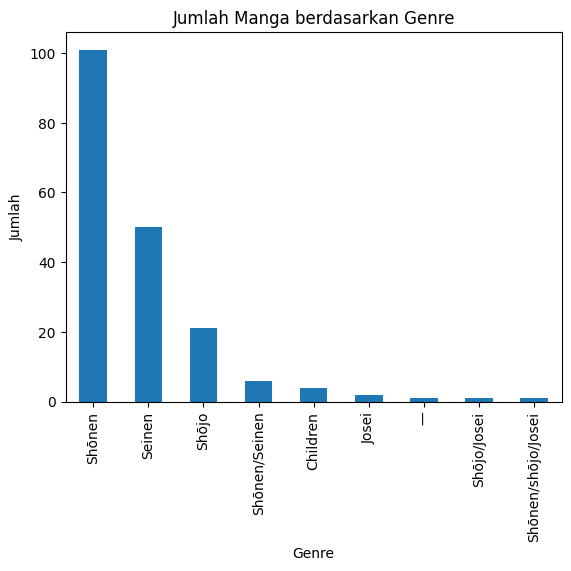

In [ ]:
df["Demographic"].value_counts().plot(kind="bar", xlabel="Genre", ylabel="Jumlah", title="Jumlah Manga berdasarkan Genre")
plt.show()

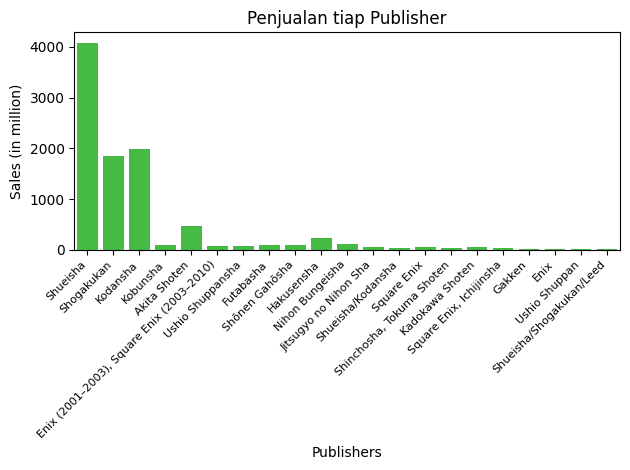

In [ ]:
sns.barplot(x='Publisher', y='Approximate sales in million(s)', data=df, estimator=sum, errorbar=None, color='limegreen')
plt.xlabel('Publishers')
plt.ylabel('Sales (in million)')
plt.title('Penjualan tiap Publisher')
plt.xticks(rotation=45, ha='right', fontsize=8)

plt.tight_layout()
plt.show()

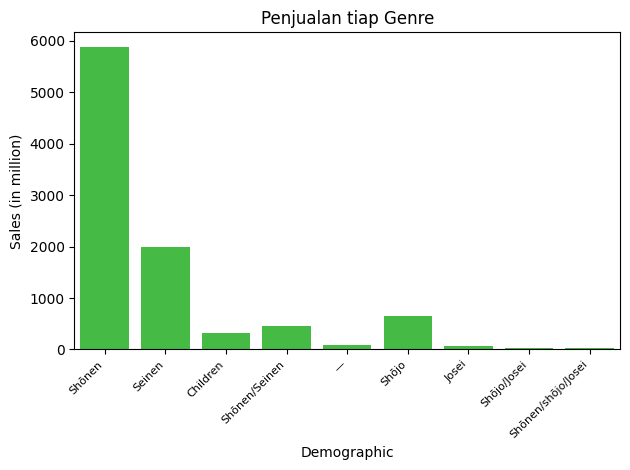

In [ ]:
sns.barplot(x='Demographic', y='Approximate sales in million(s)', data=df, estimator=sum, errorbar=None, color='limegreen')
plt.xlabel('Demographic')
plt.ylabel('Sales (in million)')
plt.title('Penjualan tiap Genre')
plt.xticks(rotation=45, ha='right', fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
num_cols = df.select_dtypes(include=[np.number])
corr_matrix = num_cols.corr()
corr_matrix

,No. of collected volumes,Approximate sales in million(s),Average sales per volume in million(s)
No. of collected volumes,1.000000,0.385699,-0.300739
Approximate sales in million(s),0.385699,1.000000,0.523410
Average sales per volume in million(s),-0.300739,0.523410,1.000000


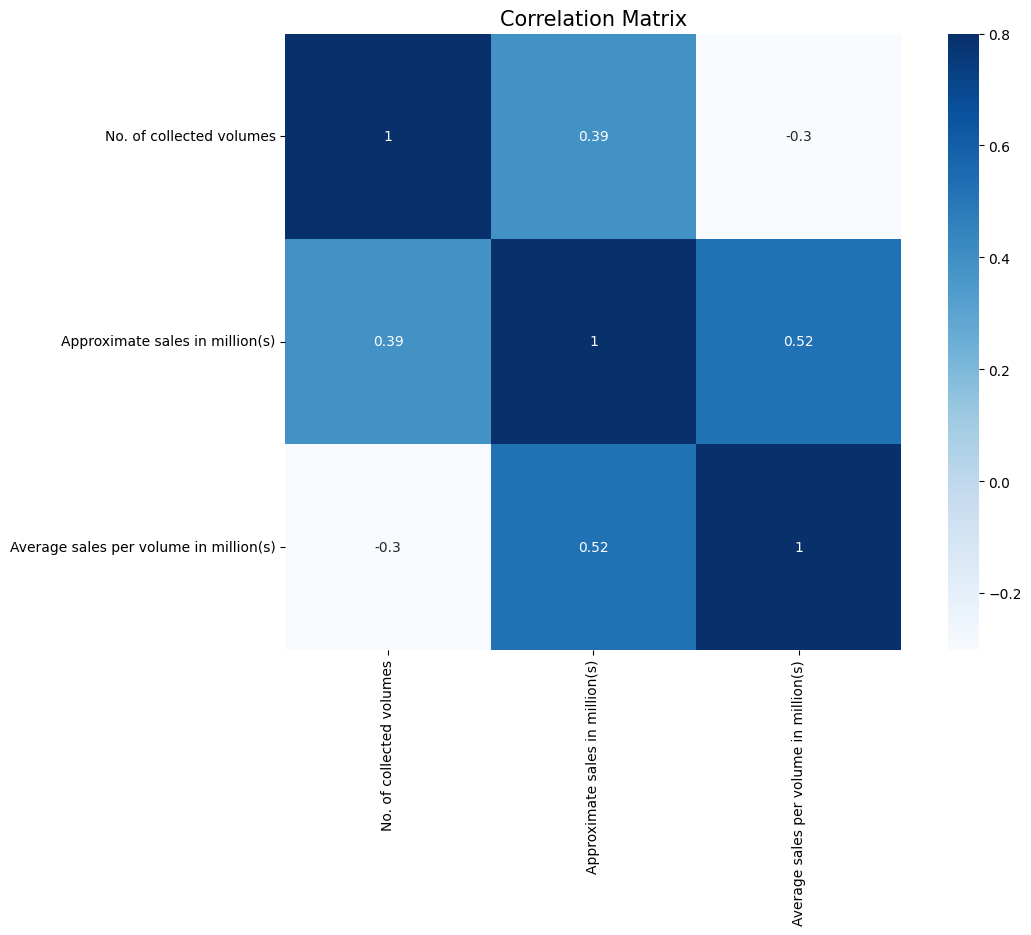

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
sns.heatmap(corr_matrix, vmax =.8, square = True, annot = True,cmap='Blues' )
plt.title('Correlation Matrix',fontsize=15);